In [2]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [8]:
import reddit
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

In [2]:
## Downloads the subreddits from the list

#Parameters
DATE_MIN = "2017-01-01"
DATE_MAX = None
subreddit_list = ['brasil', 'brasilivre']
#fields=['author', 'title', 'domain', "created_utc", 'id']
fields = None

#Downloads it
df = pd.DataFrame()
for subreddit in subreddit_list:
    
    df_sub = reddit.download_posts(subreddit, date_min=DATE_MIN, date_max = DATE_MAX, fields = fields) #Downloads submission data from pushshift.io
    df_sub = reddit.update_praw(df_sub) #Adds updated scores from praw (reddit api)
    
    df_sub.to_csv('data/' + subreddit + '_' + DATE_MIN + '.csv', index=False) #Saves dataframes of each subreddit
    
    df = df.append(df_sub, sort = True) #Appends dataframe

#Saves dataframe
str_save = 'brazilian_subreddits_' + DATE_MIN + '.csv'
df.to_csv(str_save, index=False) #Saves final dataframe

Submission 10000 of 219000
Submission 20000 of 219000
Submission 30000 of 219000
Submission 40000 of 219000
Submission 50000 of 219000
Submission 60000 of 219000
Submission 70000 of 219000
Submission 80000 of 219000
Submission 90000 of 219000
Submission 100000 of 219000
Submission 110000 of 219000
Submission 120000 of 219000
Submission 130000 of 219000
Submission 140000 of 219000
Submission 150000 of 219000
Submission 160000 of 219000
Submission 170000 of 219000
Submission 180000 of 219000
Submission 190000 of 219000
Submission 200000 of 219000
Submission 210000 of 219000
Submission 10000 of 62500
Submission 20000 of 62500
Submission 30000 of 62500
Submission 40000 of 62500
Submission 50000 of 62500
Submission 60000 of 62500


In [ ]:
#Censors results


In [55]:
## Adds columns
df['score_ratio'] = df['score_updated']/df['num_comments_updated']

/home/joaopn/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,6,7,8,9,10,12,13,14,15,16,17,18,20,21,22,23,26,28,29,30,35,36,38,39,40,41,42,43,44,45,46,47,48,50,51,52,55,56,57,61,62,63,64,66,69,71,73,74,76,82,83,84,85,88,90,91,101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


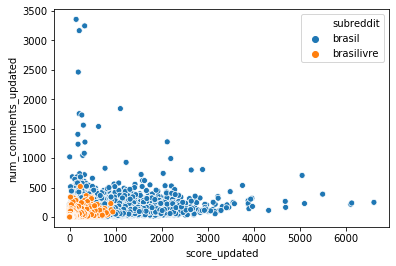

In [7]:
## plots results
#df = pd.read_csv('brazilian_subreddits_2017-01-01.csv')

#Scatterplot score vs number of comments
sns.scatterplot(data=df,x='score_updated',y='num_comments_updated', hue='subreddit')



/home/joaopn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/joaopn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


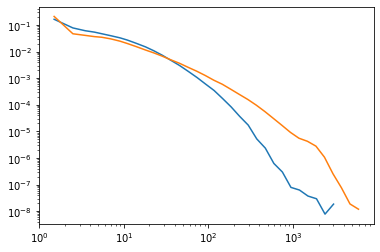

In [17]:
#Power-laws?
n_comm = np.array(df['num_comments_updated'])
powerlaw.plot_pdf(n_comm[n_comm>0])
score = np.array(df['score_updated'])
powerlaw.plot_pdf(score[score>0])